In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data_io import read_iq_data
from filters import simple_squelch, decimating_fir_filter, add_awgn
from visualisation import plot_payload, compare_bits_with_reference, subplots_iq
from receiver import ReceiverBLE

# Read reference for BER comparison

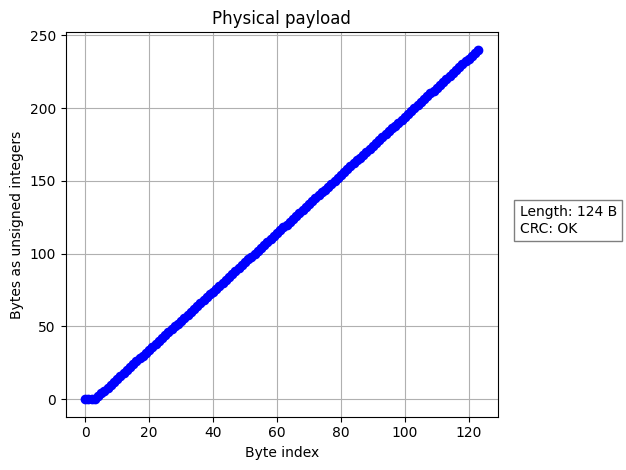

In [2]:
filename: str = "BLE_0dBm.dat"
fs: int | float = 10e6  # Hz
sps = 10
decimation: int = 1
base_address = 0x12345678  # As defined in DotBot radio_default.h

# Open file
iq_samples = read_iq_data(f"../capture_nRF/data/new/{filename}")
iq_samples = decimating_fir_filter(
    iq_samples, decimation=decimation, gain=1, fs=fs, cutoff_freq=1.5e6, transition_width=1000e3, window="hamming"
)
iq_samples = simple_squelch(iq_samples, threshold=10e-2)

# Initialise the receiver and process data
receiver = ReceiverBLE(fs=fs / decimation, sps=sps / decimation)
bit_samples = receiver.demodulate(iq_samples)  # From IQ samples to hard decisions
reference_packet: list[dict] = receiver.process_phy_packet(bit_samples, base_address)  # From hard decisions to packets
reference_packet: dict = reference_packet[0]
plot_payload(reference_packet)
plt.show()

# Read interferenced packet and compare (BER)

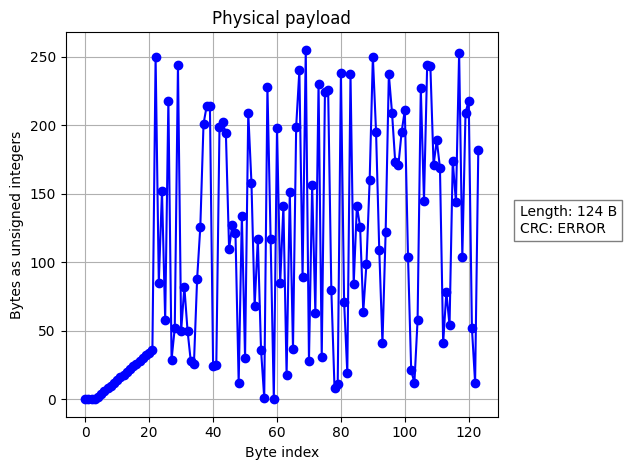

bit_error_rate = 38.41


In [3]:
filename: str = "BLE_tone_0dBm_8dBm_0MHz.dat"

# Open file
iq_samples = read_iq_data(f"../capture_nRF/data/new/{filename}")
iq_samples = decimating_fir_filter(
    iq_samples, decimation=decimation, gain=1, fs=fs, cutoff_freq=1.5e6, transition_width=1000e3, window="hamming"
)
iq_samples = simple_squelch(iq_samples, threshold=10e-2)

# Initialise the receiver and process data
receiver = ReceiverBLE(fs=fs / decimation, sps=sps / decimation)
bit_samples = receiver.demodulate(iq_samples)  # From IQ samples to hard decisions
interfered_packet: list[dict] = receiver.process_phy_packet(bit_samples, base_address)  # From hard decisions to packets
interfered_packet: dict = interfered_packet[0]
plot_payload(interfered_packet)
plt.show()

bit2bit_difference = compare_bits_with_reference(interfered_packet["payload"], reference_packet["payload"])
bit_error_rate = sum(bit2bit_difference) / len(bit2bit_difference) * 100
print(f"{bit_error_rate = :.2f}")

# Read interference and plot it with interfered packet

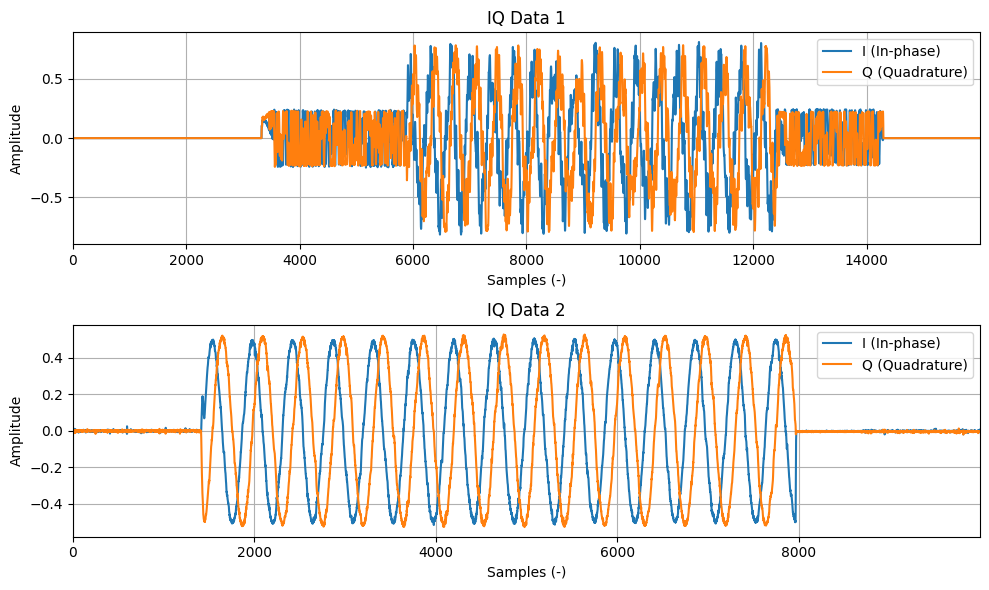

In [4]:
filename: str = "tone_8dBm_0MHz_BLE.dat"

# Open file
iq_samples_interference = read_iq_data(f"../capture_nRF/data/new/{filename}")
subplots_iq([iq_samples, iq_samples_interference], fs)